## Erick Salvador Alvarez Valencia

In [164]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from skimage.io import imread
from skimage import color
from scipy import fftpack
from scipy.ndimage.filters import gaussian_filter

In [108]:
image = imread('image.png')

## Ejercicio 1

En Python, considere una lista de listas (un arreglo bidimensional). Por ejemplo:

In [191]:
A = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]

Utilizando sólo listas (esto es, sin usar numpy), calcule la matriz transpuesta $A^T$:

a) Usando ciclos for

Simplemente se crea un arreglo vacío y se van añadiendo los valores pero iterando la matriz primero por columnas y luego por filas.

In [192]:
rows = len(A)
cols = len(A[0])

T = []
for j in range(cols):
    aux = []
    for i in range(rows):
        aux.append(A[i][j])
    T.append(aux)

print(T)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]


b) usando list comprehension.

In [194]:
rows = len(A)
cols = len(A[0])

T = [[row[i] for row in A] for i in range(cols)]
print(T)

[[1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15], [4, 8, 12, 16]]


## Ejercicio 2

Se quiere generar números aleatorios con distribución normal $N(\mu, \sigma)$. Una forma de lograr esto es generar $n$ variables aleatorias $X_1, X_2, . . . , X_n$ i.i.d., cada una con distribución uniforme $U$ en un intervalo $[a, b]$, y luego estudiar la distribución de la suma. $$Y = X_1 + X_2 + . . . + X_n.$$
Cuando n toma valores muy grandes (n $\rightarrow$ $\infty$), la distribución de $Y$ converge a una distribución normal (¿por qué?).

$\textbf{R:}$ Se tiene que por el teorema de límite central (T.L.C.) la suma de $n$ de variables aleatorias independientes y con varianza no nula se aproximará a una distribución normal cuando $n$ sea lo suficientemente grande.

a) Elabore una función que genere $n$ muestras de $N$ números aleatorios con distribución uniforme $U$ sobre un intervalo $[a, b]$. Utilice $n$, $N$ y $[a, b]$ como parámetros de su función. (Cada una de estas muestras corresponde a una variable aleatoria $X_i$, 1 $\leq$ i $\leq$ n).
Luego, construya la distribución de la suma $Y = \sum_{i = 1}^n X_i$. Explore resultados con $n$ = 1, 2, 3, 5, 10 y 100. Tome N $\geq$ 104. Grafique las distribuciones obtenidas usando histogramas. Elija un intervalo y un número de bins apropiado para sus gráficas.

Primero se generan los vectores aleatorios usando distribuciones uniformes.

In [197]:
def generateDist(n, N, a, b):
    res = np.zeros((n, N), dtype = np.float32)
    for i in range(n):
        res[i] = np.random.uniform(a, b, N)
    
    return res

Posteriormente se generan varios conjuntos de vectores aleatorios con diferentes tamaños y se suman.

In [198]:
N = 1500
a, b = -10, 10

vArr1 = generateDist(1, N, a, b)
nG1 = np.sum(vArr1, axis = 0)

vArr2 = generateDist(2, N, a, b)
nG2 = np.sum(vArr2, axis = 0)

vArr3 = generateDist(3, N, a, b)
nG3 = np.sum(vArr3, axis = 0)

vArr5 = generateDist(5, N, a, b)
nG5 = np.sum(vArr5, axis = 0)

vArr10 = generateDist(10, N, a, b)
nG10 = np.sum(vArr10, axis = 0)

vArr100 = generateDist(100, N, a, b)
nG100 = np.sum(vArr100, axis = 0)

A continuación se muestran las gráficas.

Text(0.5,1,'N = 100')

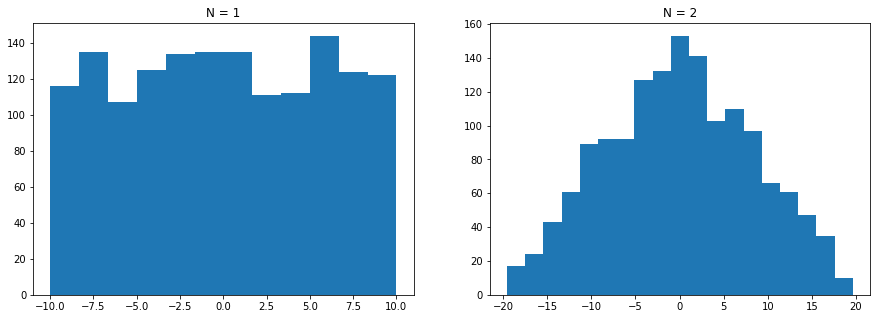

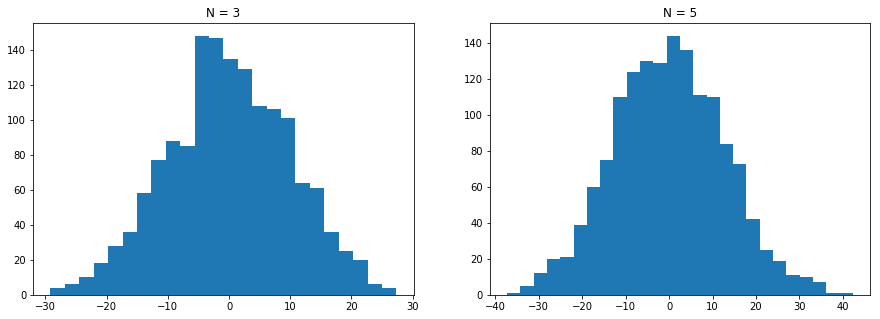

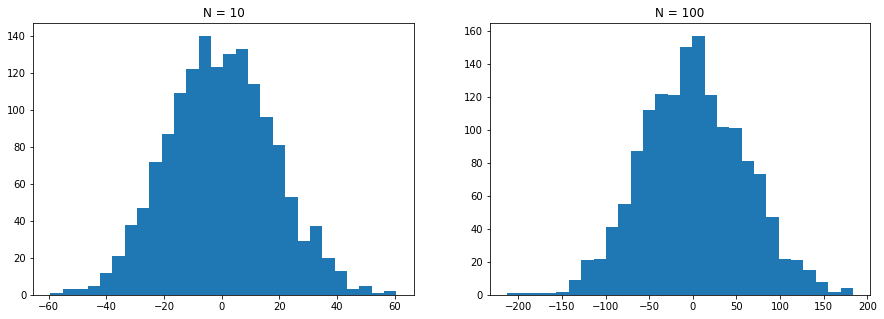

In [200]:
fig1 = plt.figure(figsize = (15, 5))
fig2 = plt.figure(figsize = (15, 5))
fig3 = plt.figure(figsize = (15, 5))
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
iax1 = fig2.add_subplot(1, 2, 1)
iax2 = fig2.add_subplot(1, 2, 2)
cax1 = fig3.add_subplot(1, 2, 1)
cax2 = fig3.add_subplot(1, 2, 2)

ax1.hist(nG1, bins = 'auto')
ax2.hist(nG2, bins = 'auto')
iax1.hist(nG3, bins = 'auto')
iax2.hist(nG5, bins = 'auto')
cax1.hist(nG10, bins = 'auto')
cax2.hist(nG100, bins = 'auto')

ax1.set_title("N = 1")
ax2.set_title("N = 2")
iax1.set_title("N = 3")
iax2.set_title("N = 5")
cax1.set_title("N = 10")
cax2.set_title("N = 100")

b) ¿Cuál es la media $\mu$ y la varianza $\sigma^2$ de la distribución de $Y$?

$$E[Y] = E[\sum_{i = 1}^n X_i]$$
$$E[Y] = \sum_{i = 1}^n E[X_i]$$

Como cada $X_i$ es idénticamente distribuida entonces se tiene que las $X_i$ tienen la misma media, además $X_i \sim U[a, b]$ entonces $E[X_i] = \frac{a + b}{2}$

Por lo que nos queda: $$E[Y] = \sum_{i = 1}^n \frac{a + b}{2} = \frac{n (a + b)}{2}$$

Se hace lo mismo para la varianza: $$Var(Y) = Var(\sum_{i = 1}^n X_i)$$

La varianza de una suma es la suma de las varianzas si las variables aleatorias son independientes, lo cual es el presente caso.

$$Var(Y) = \sum_{i = 1}^n Var(X_i)$$

Como $X_i \sim U[a, b]$ entonces $Var(X_i) = \frac{(b - a)^2}{12}$, finalmente se tiene que: $$Var(Y) = \sum_{i = 1}^n Var(X_i) = \sum_{i = 1}^n \frac{(b - a)^2}{12} = \frac{n (b - a)^2}{12}$$

c) De lo anterior, explique cómo hacer para generar números aleatorios que simulen una distribució normal $N(\mu, \sigma)$ con $\mu$ y $\sigma$ dadas? Genere números aleatorios con distribución normal $N(\mu, \sigma)$, con $\mu = 0$, $\sigma = 1$, y con $\mu = 10$, $\sigma = 3$. Grafique sus distribuciones obtenidas y muestre los valores $\mu$, $\sigma$ obtenidos en su simulación.

Usando las ecuaciones anteriores y asumiendo que $n$ es lo suficientemente grande podemos despejar tanto a $a$ como a $b$ resolviendo un sistema de ecuaciones, las fórmulas para dichos términos son: $$a = \frac{\mu}{n} - \sqrt{\frac{3 \sigma^2}{n}}$$ $$b = \frac{\mu}{n} + \sqrt{\frac{3 \sigma^2}{n}}$$

In [202]:
def generateDist2(n, N, mu, sigma):
    a = mu / float(n) - np.sqrt(3.0 * sigma / float(n))
    b = mu / float(n) + np.sqrt(3.0 * sigma / float(n))
    
    res = np.zeros((n, N), dtype = np.float32)
    for i in range(n):
        res[i] = np.random.uniform(a, b, N)
    
    return res

Se vuelven a generar vectores aleatorios pero esta vez con las distribuciones uniformes que aseguran dar una gaussiana con media y varianzas específicas aplicando el TLC.

In [203]:
mu, sigma = 0.0, 1.0
N = 3500
n = 1000

dist1 = generateDist2(n, N, mu, sigma)
nG1 = np.sum(dist1, axis = 0)

mu, sigma = 10.0, 3.0
dist2 = generateDist2(n, N, mu, sigma)
nG2 = np.sum(dist2, axis = 0)

En la segunda imagen hay que cuidar la escala.

Text(0.5,1,'Mu = 10, Sigma = 3')

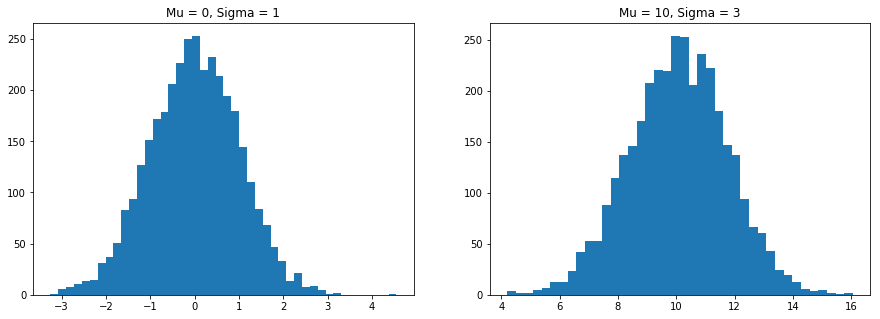

In [204]:
fig1 = plt.figure(figsize = (15, 5))
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)

ax1.hist(nG1, bins = 'auto')
ax2.hist(nG2, bins = 'auto')

ax1.set_title("Mu = 0, Sigma = 1")
ax2.set_title("Mu = 10, Sigma = 3")

## Ejercicio 3

Genere una matriz simétrica A de tamaño 100 × 100 con entradas en $R$.
Usando el método de las potencias, calcule los primeros $k$ auto-valores de A (esto es, los $k$ mayores auto-valores de A).

Primero generamos una matriz cuadrada con números uniformes y luego aplicando la fórmula $B = (A + A^T) / 2$ generamos una matriz simétrica.

In [205]:
n = 100

def generateRandomMat(n, a, b):
    res = np.zeros((n, n), dtype = np.float32)
    for i in range(n):
        res[i] = np.random.uniform(a, b, n)
    
    return res

Mat = generateRandomMat(n, -100, 100)
A = (Mat + Mat.T) / 2.0
print(A)

#Verificar que la matriz sea simétrica
print(A == A.T)

[[-13.233231   -3.198979   50.276028  ...  18.195421   53.90181
  -22.004652 ]
 [ -3.198979    3.801578   -6.2945614 ...  42.899334  -35.33254
   -8.683216 ]
 [ 50.276028   -6.2945614 -34.878674  ...  13.316102  -33.48146
    2.9905376]
 ...
 [ 18.195421   42.899334   13.316102  ...   7.5644536   1.3746567
   -9.991127 ]
 [ 53.90181   -35.33254   -33.48146   ...   1.3746567  10.547853
   54.67699  ]
 [-22.004652   -8.683216    2.9905376 ...  -9.991127   54.67699
   52.125946 ]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


El método de la potencia calculará los primeros $k$ eigenvectores.

In [206]:
def eigenvalue(A, v):
    Av = A.dot(v)
    return v.dot(Av)

def powerMethod(A, n, tol, nIter, k):
    eigenvectors = np.zeros((k, n), dtype = np.float32)
    eigenvals = np.zeros((k), dtype = np.float32)
    vlast = np.zeros((n), dtype = np.float32)
    llast = 0.0
    
    for i in range(k):
        print("Calculando eigenpares: ", str(i + 1))
        v0 = np.ones((n), dtype = np.float32)
        cnt = 0
        vk = np.copy(v0)
        A -= (llast * np.outer(vlast, vlast))
        lambdak = 0.0
        while True:
            yk1 = A.dot(vk)
            vk1 = yk1 / LA.norm(yk1)
            lambdak1 = eigenvalue(A, vk1)
            vk = np.copy(vk1)
            lambdak = lambdak1
            cnt += 1

            nn = LA.norm(yk1 - lambdak1 * vk)
            if nn < tol:
                print("Algoritmo terminado: Tolerancia alcanzada.")
                break
            if cnt >= nIter:
                print("Algoritmo terminado: Número de iteraciones alcanzado.")
                break
        
        eigenvectors[i] = vk
        eigenvals[i] = lambdak
        vlast = np.copy(vk)
        llast = lambdak
    
    return eigenvectors, eigenvals

Calculamos los primeros 3 eigenvalores, eigenvectores.

In [207]:
Ac = np.copy(A)
eigenvectors, eigenvals = powerMethod(A, n, 1e-3, 10000, 3)

Calculando eigenpares:  1
Algoritmo terminado: Tolerancia alcanzada.
Calculando eigenpares:  2
Algoritmo terminado: Número de iteraciones alcanzado.
Calculando eigenpares:  3
Algoritmo terminado: Tolerancia alcanzada.


A continuación se muestran los eigenvalores.

In [210]:
print(eigenvals)

[ 785.94495 -746.81134  746.24835]


In [211]:
print(eigenvectors)

[[ 0.15219198  0.06291486 -0.02482484 -0.00720728 -0.01910384 -0.10866364
   0.0140593  -0.19675206  0.05941678 -0.12529765 -0.02141664  0.10545512
  -0.00937506 -0.14972615  0.08804385 -0.15687834  0.03066567 -0.00697558
  -0.11265043 -0.0082246   0.09711178  0.03682715  0.01771213  0.00462489
   0.17114589  0.00210987 -0.01220885  0.16086282 -0.07453279 -0.00211475
   0.11053283  0.10170023 -0.11175833  0.09197757  0.00219429  0.07678483
  -0.02464216 -0.0298728  -0.06828889  0.0593704   0.24643524 -0.00045243
   0.00178887  0.0365809  -0.00233378  0.02409292  0.26913384  0.08107626
   0.03115699 -0.05533202 -0.10302966  0.04110424  0.11561357  0.03295439
   0.02875657 -0.08765175 -0.17217706 -0.17555566  0.08475266 -0.07907373
  -0.08802577  0.19217938  0.06577237  0.07559969  0.00371194 -0.07379491
  -0.14885736  0.07888673 -0.09394976 -0.17317337  0.03157654  0.14996321
   0.11041265 -0.07901071 -0.12060444 -0.09677424 -0.07880657  0.12094174
   0.0064976   0.02696859  0.00747634 

Para asegurarse que los resultados son correctos, se llamó a una función de numpy que calcula eigenvalores y eigenvectores, luego se ordenaron los eigenvalores por su valor absoluto y se imprimieron, se puede ver que los resultados coinciden.

In [212]:
w, v = LA.eig(Ac)
w = np.sort(np.abs(w))[::-1]
print(w)

[785.94586   746.81085   746.25574   737.7207    731.1474    710.34344
 704.6351    702.2929    689.41815   670.48486   660.3523    652.4943
 645.7138    627.25977   617.85565   601.1136    598.28253   594.1847
 576.28815   561.0289    559.2455    549.9264    541.3837    533.9065
 531.4044    519.9606    514.18835   506.65305   501.90134   490.90332
 483.65314   475.47052   453.68893   450.77344   442.3961    433.91843
 426.57162   423.03796   417.2565    412.8422    409.94754   399.75046
 396.3579    395.22098   379.0479    376.21582   367.56567   359.05444
 356.00708   341.8305    336.4367    333.13272   327.51157   311.81104
 306.96854   306.9498    293.38278   288.9538    284.53262   281.80276
 265.58496   261.42932   245.16046   242.47737   230.60086   226.6398
 220.30818   215.99998   209.07295   202.59952   188.29236   184.33934
 182.95615   174.92542   172.37338   159.0853    156.61002   155.49825
 145.84247   144.80519   131.19756   128.5985    116.42845   109.8401
  99.172676

## Ejercicio 4

Para hallar la raíz cuadrada de un número $b \in R^+$, se debe resolver la ecuación $x^2 − b = 0$. Usaremos métodos iterativos.

Sus funciones deben incluir como parámetros el valor de $b, \alpha > 0$, el punto inicial $x_0$, y parámetro requeridos por algún criterio de paro (tolerancia  $> 0$  ́o número máximo de iteraciones $N$). Deben imprimir los resultados y error en cada iteración.
Aproxime $\sqrt{2}$ con ambos métodos, para diferentes valores de $x_0 = 0, 2, 10, 50, 100$. Compare gráficamente el error de ambos métodos en cada caso.
Discuta sus resultados. ¿Cuál es el rol del valor $\alpha$ en el método de punto fijo? ¿Por qué a veces e método converge y en ocasiones diverge? ¿Cuál es el equivalente de $\alpha$ en el método de Newton?

Se hace el código de los métodos.

In [83]:
def f(x, b):
    return x ** 2 - b

def fp(x):
    return 2.0 * x

def fixedP(x0, b, alpha, tol, nIter):
    xk = x0
    cnt = 0
    errIter = []
    while True:
        pk = f(xk, b)
        xk1 = xk - alpha * pk
        cnt += 1
        err = np.abs(xk1 - xk)
        errIter.append(err)
        print("Iteración {0} - Valor de xk: {1}, Error: {2}".format(cnt, xk1, err))
        
        if err < tol:
            print("Algoritmo terminado: Tolerancia alcanzada.")
            break
        if cnt >= nIter:
            print("Algoritmo terminado: Número de iteraciones alcanzado.")
            break
        
        xk = xk1
    
    return xk, np.array(errIter)

def newton(x0, b, tol, nIter):
    xk = x0
    cnt = 0
    errIter = []
    while True:
        fk = f(xk, b)
        fpk = fp(xk)
        xk1 = xk - (fk / fpk)
        cnt += 1
        err = np.abs(xk1 - xk)
        errIter.append(err)
        print("Iteración {0} - Valor de xk: {1}, Error: {2}".format(cnt, xk1, err))
        
        if err < tol:
            print("Algoritmo terminado: Tolerancia alcanzada.")
            break
        if cnt >= nIter:
            print("Algoritmo terminado: Número de iteraciones alcanzado.")
            break
        
        xk = xk1
    
    return xk, np.array(errIter)

A continuación se van a ejecutar los métodos para diferentes puntos iniciales y se mostrará el número de iteraciones, el error y el valor de $x_k$ en cada iteración.

In [100]:
b = 2.0
x0 = 0.0
alpha = 0.5

xresFp1, errIterFp1 = fixedP(x0, b, alpha, 1e-4, 500)
errIterN1 = np.zeros((10))
#En este caso no se puede llamar a newton con el punto incial x0 = 0 porque el cociente con la derivada no está definido

Iteración 1 - Valor de xk: 1.0, Error: 1.0
Iteración 2 - Valor de xk: 1.5, Error: 0.5
Iteración 3 - Valor de xk: 1.375, Error: 0.125
Iteración 4 - Valor de xk: 1.4296875, Error: 0.0546875
Iteración 5 - Valor de xk: 1.407684326171875, Error: 0.022003173828125
Iteración 6 - Valor de xk: 1.4168967450968921, Error: 0.009212418925017118
Iteración 7 - Valor de xk: 1.4130985519638084, Error: 0.003798193133083716
Iteración 8 - Valor de xk: 1.4146747931827024, Error: 0.0015762412188939923
Iteración 9 - Valor de xk: 1.4140224079494415, Error: 0.0006523852332609437
Iteración 10 - Valor de xk: 1.4142927228578732, Error: 0.000270314908431768
Iteración 11 - Valor de xk: 1.4141807698935047, Error: 0.00011195296436850022
Iteración 12 - Valor de xk: 1.4142271449252117, Error: 4.637503170701329e-05
Algoritmo terminado: Tolerancia alcanzada.


In [89]:
x0 = 2.0
xresFp2, errIterFp2 = fixedP(x0, b, alpha, 1e-4, 500)
xresN2, errIterN2 = newton(x0, b, 1e-4, 500)

Iteración 1 - Valor de xk: 1.0, Error: 1.0
Iteración 2 - Valor de xk: 1.5, Error: 0.5
Iteración 3 - Valor de xk: 1.375, Error: 0.125
Iteración 4 - Valor de xk: 1.4296875, Error: 0.0546875
Iteración 5 - Valor de xk: 1.407684326171875, Error: 0.022003173828125
Iteración 6 - Valor de xk: 1.4168967450968921, Error: 0.009212418925017118
Iteración 7 - Valor de xk: 1.4130985519638084, Error: 0.003798193133083716
Iteración 8 - Valor de xk: 1.4146747931827024, Error: 0.0015762412188939923
Iteración 9 - Valor de xk: 1.4140224079494415, Error: 0.0006523852332609437
Iteración 10 - Valor de xk: 1.4142927228578732, Error: 0.000270314908431768
Iteración 11 - Valor de xk: 1.4141807698935047, Error: 0.00011195296436850022
Iteración 12 - Valor de xk: 1.4142271449252117, Error: 4.637503170701329e-05
Algoritmo terminado: Tolerancia alcanzada.
Iteración 1 - Valor de xk: 1.5, Error: 0.5
Iteración 2 - Valor de xk: 1.4166666666666667, Error: 0.08333333333333326
Iteración 3 - Valor de xk: 1.4142156862745099, E

Para este caso hay que usar un valor de $\alpha$ más pequeño, si no el método diverge.

In [94]:
x0 = 10.0
alpha = 0.1
xresFp3, errIterFp3 = fixedP(x0, b, alpha, 1e-4, 500)
xresN3, errIterN3 = newton(x0, b, 1e-4, 500)

Iteración 1 - Valor de xk: 0.1999999999999993, Error: 9.8
Iteración 2 - Valor de xk: 0.39599999999999935, Error: 0.19600000000000006
Iteración 3 - Valor de xk: 0.5803183999999995, Error: 0.1843184000000001
Iteración 4 - Valor de xk: 0.7466414554621436, Error: 0.1663230554621441
Iteración 5 - Valor de xk: 0.8908941091606808, Error: 0.14425265369853724
Iteración 6 - Valor de xk: 1.0115248777869605, Error: 0.12063076862627975
Iteración 7 - Valor de xk: 1.109206619948768, Error: 0.09768174216180747
Iteración 8 - Valor de xk: 1.186172687374951, Error: 0.07696606742618295
Iteración 9 - Valor de xk: 1.2454721229475196, Error: 0.05929943557256867
Iteración 10 - Valor de xk: 1.2903520420435795, Error: 0.04487991909605982
Iteración 11 - Valor de xk: 1.3238512028029759, Error: 0.03349916075939641
Iteración 12 - Valor de xk: 1.3485930020866872, Error: 0.02474179928371134
Iteración 13 - Valor de xk: 1.366722693558969, Error: 0.018129691472281717
Iteración 14 - Valor de xk: 1.3799296014500606, Error

In [97]:
x0 = 50.0
alpha = 0.009
xresFp4, errIterFp4 = fixedP(x0, b, alpha, 1e-4, 500)
xresN4, errIterN4 = newton(x0, b, 1e-4, 500)

Iteración 1 - Valor de xk: 27.518, Error: 22.482
Iteración 2 - Valor de xk: 20.720837084000003, Error: 6.797162915999998
Iteración 3 - Valor de xk: 16.874659278844977, Error: 3.846177805155026
Iteración 4 - Valor de xk: 14.329872146850997, Error: 2.5447871319939797
Iteración 5 - Valor de xk: 12.499765025145134, Error: 1.830107121705863
Iteración 6 - Valor de xk: 11.11156789399056, Error: 1.3881971311545733
Iteración 7 - Valor de xk: 10.018365424425705, Error: 1.0932024695648561
Iteración 8 - Valor de xk: 9.13305661242975, Error: 0.8853088119959551
Iteración 9 - Valor de xk: 8.40034210465713, Error: 0.73271450777262
Iteración 10 - Valor de xk: 7.783250377379651, Error: 0.6170917272774785
Iteración 11 - Valor de xk: 7.2560394994468265, Error: 0.5272108779328244
Iteración 12 - Valor de xk: 6.800188516489033, Error: 0.45585098295779325
Iteración 13 - Valor de xk: 6.402005441750929, Error: 0.3981830747381041
Iteración 14 - Valor de xk: 6.051134378665052, Error: 0.3508710630858767
Iteración 

In [98]:
x0 = 100.0
xresFp5, errIterFp5 = fixedP(x0, b, alpha, 1e-4, 500)
xresN5, errIterN5 = newton(x0, b, 1e-4, 500)

Iteración 1 - Valor de xk: 10.018, Error: 89.982
Iteración 2 - Valor de xk: 9.132757084000001, Error: 0.8852429159999993
Iteración 3 - Valor de xk: 8.400091816401831, Error: 0.7326652675981702
Iteración 4 - Valor de xk: 7.7830379336860025, Error: 0.6170538827158287
Iteración 5 - Valor de xk: 7.255856818391245, Error: 0.5271811152947574
Iteración 6 - Valor de xk: 6.800029694870292, Error: 0.4558271235209528
Iteración 7 - Valor de xk: 6.401866060210232, Error: 0.3981636346600599
Iteración 8 - Valor de xk: 6.051011058734387, Error: 0.35085500147584536
Iteración 9 - Valor de xk: 5.7394784452380545, Error: 0.31153261349633254
Iteración 10 - Valor de xk: 5.461003929827885, Error: 0.27847451541016977
Iteración 11 - Valor de xk: 5.210600854533524, Error: 0.25040307529436046
Iteración 12 - Valor de xk: 4.984247603146135, Error: 0.2263532513873896
Iteración 13 - Valor de xk: 4.778663085620923, Error: 0.205584517525212
Iteración 14 - Valor de xk: 4.591142497648038, Error: 0.18752058797288473
Iter

Se pudo notar que en las últimas 3 ejecuciones, el método de punto fijo hizo muchas iteraciones en comparación al método de newton que en promedio hacía 5 iteraciones. Esto anterior porque se usó un $\alpha$ más pequeño ya que si se mantenía el que se usó al princio, el método no convergía, por lo que se puede ver a este parámetro un tamaño de paso del método.
Finalmente se puede apreciar que en todas las ejecuciones, estos métodos calcularon exitosamente el valor de la raíz cuadrada de 2.

Text(0.5,1,'Newton. X0 = 100')

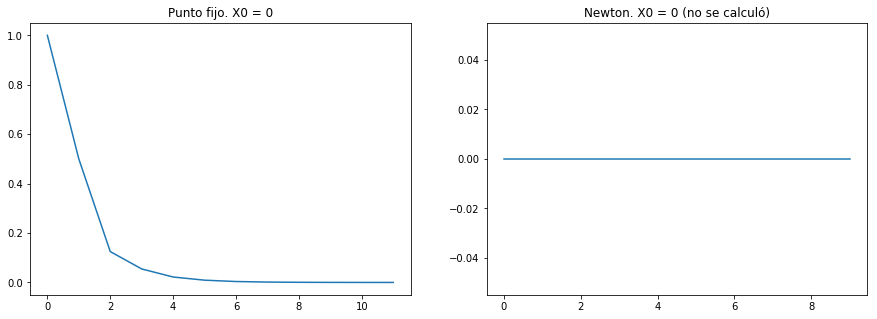

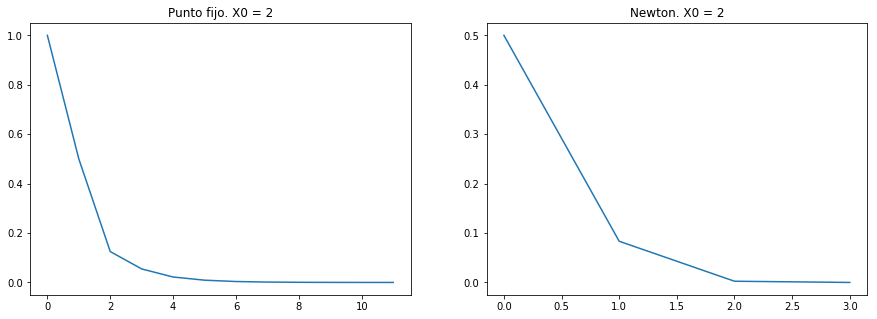

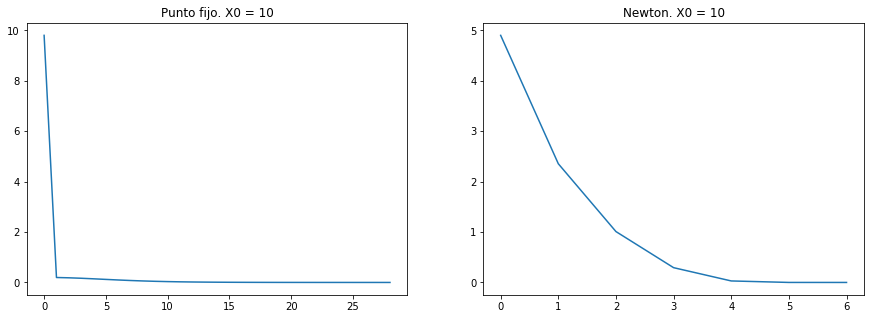

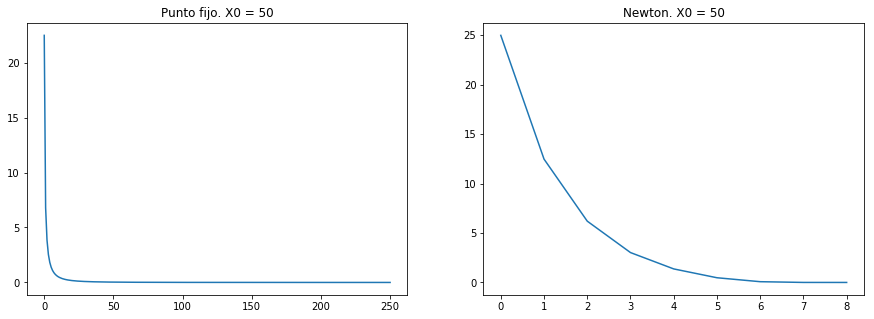

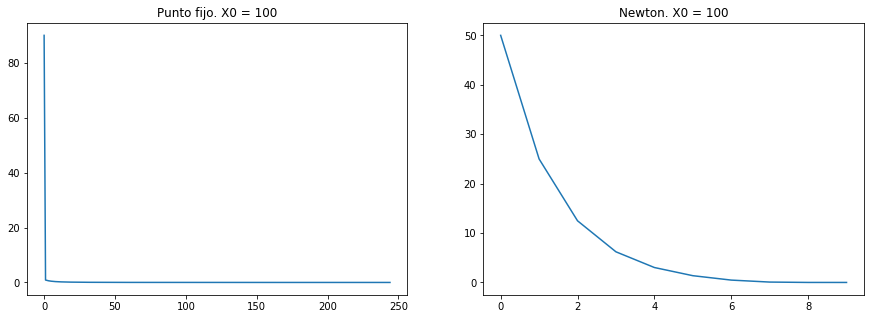

In [213]:
fig1 = plt.figure(figsize = (15, 5))
fig2 = plt.figure(figsize = (15, 5))
fig3 = plt.figure(figsize = (15, 5))
fig4 = plt.figure(figsize = (15, 5))
fig5 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)
ax21 = fig2.add_subplot(1, 2, 1)
ax22 = fig2.add_subplot(1, 2, 2)
ax31 = fig3.add_subplot(1, 2, 1)
ax32 = fig3.add_subplot(1, 2, 2)
ax41 = fig4.add_subplot(1, 2, 1)
ax42 = fig4.add_subplot(1, 2, 2)
ax51 = fig5.add_subplot(1, 2, 1)
ax52 = fig5.add_subplot(1, 2, 2)

ax11.plot(errIterFp1)
ax12.plot(errIterN1)
ax21.plot(errIterFp2)
ax22.plot(errIterN2)
ax31.plot(errIterFp3)
ax32.plot(errIterN3)
ax41.plot(errIterFp4)
ax42.plot(errIterN4)
ax51.plot(errIterFp5)
ax52.plot(errIterN5)

ax11.set_title("Punto fijo. X0 = 0")
ax12.set_title("Newton. X0 = 0 (no se calculó)")
ax21.set_title("Punto fijo. X0 = 2")
ax22.set_title("Newton. X0 = 2")
ax31.set_title("Punto fijo. X0 = 10")
ax32.set_title("Newton. X0 = 10")
ax41.set_title("Punto fijo. X0 = 50")
ax42.set_title("Newton. X0 = 50")
ax51.set_title("Punto fijo. X0 = 100")
ax52.set_title("Newton. X0 = 100")

Podemos apreciar que en general, el método de newton decreció de una forma rápida, esto se ve reflejado en el número de iteraciones. En cambio el método de punto fijo de igual manera tuvo un descenso del error rápido aunque en las últimas ejecuciones se puede apreciar que en un gran lapso de iteraciones este casi no decreció el error, hasta que en un punto convergió a la tolerancia especificada.

## Ejercicio 5

(Filtros en el espacio de Fourier). Considere la imagen I = image.png que acompaña la tarea. Vamos a aplicar filtros a esta imagen usando propiedades de la transformada de Fourier. Puede importar las funciones fft2, ifft2 de la librer ́ıa scipy.fftpack

(a) Diseñe dos filtros de caja H, uno pasa bajas y uno pasa altas creando dos arreglos de 0’s y 1’s en numpy, como se ilustra en las Figuras 1 y 2. Cada filtro debe ser del mismo tamaño de la imagen. El ancho w de las cajas en las esquinas es un parámetro a elegir.

Convertimos la imagen a escala de grises.

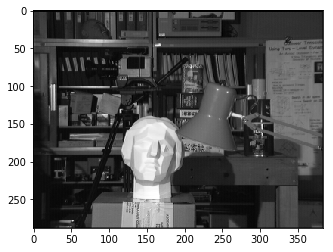

In [151]:
grayImage = color.rgb2gray(image)
plt.imshow(grayImage, cmap = "gray")

Se crean las funciones para crear los filtros de caja, los cuales son arreglos de numpy de ceros y unos y en las zonas de interés (cajas), estos tienen los valores invertidos. (0 a 1 y 1 a 0), el método recibe el tamaño de las cajas como parámetro y regresa los dos filtros.

El segundo método se encarga de aplicar la transfomada rápida de fourier a una imagen, luego se multiplica por el filtro y finalmente se aplica la transformada inversa. Hay que notar este método regresa la parte real de lo que nos devuelve la transformada inversa.

In [214]:
rows, cols = grayImage.shape

def createFilters(rows, cols, w):
    F1 = np.zeros((rows, cols), dtype = np.float32)
    F2 = np.ones((rows, cols), dtype = np.float32)

    F1[0:w, 0:w] = 1
    F1[0:w, cols - w:cols] = 1
    F1[rows - w:rows, 0:w] = 1
    F1[rows - w:rows, cols - w:cols] = 1

    F2[0:w, 0:w] = 0
    F2[0:w, cols - w:cols] = 0
    F2[rows - w:rows, 0:w] = 0
    F2[rows - w:rows, cols - w:cols] = 0
    
    return F1, F2

def processFourier(image, F):
    imCopy = np.copy(image)
    imFft = fftpack.fft2(imCopy)
    recImage = fftpack.ifft2(imFft * F)
    
    return recImage.real

Ahora se generarán filtros de caja con diferentes tamaños y se aplicarán a la imagen, se irán mostrando los resultados.

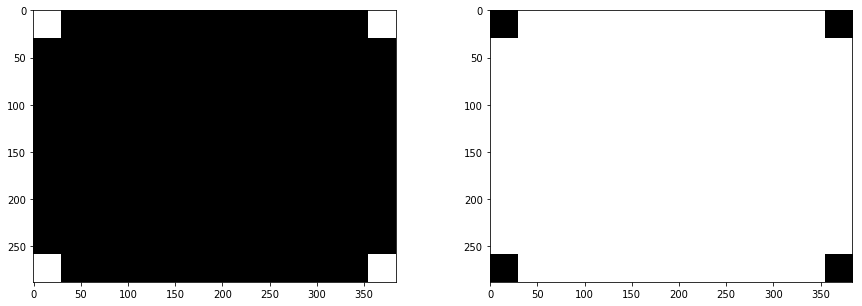

In [155]:
w = 30
F1, F2 = createFilters(rows, cols, w)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

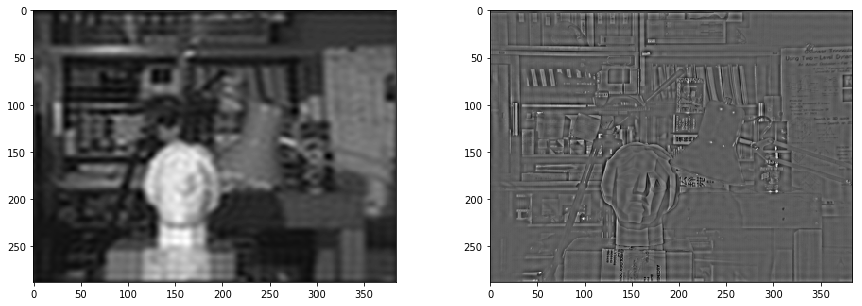

In [156]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

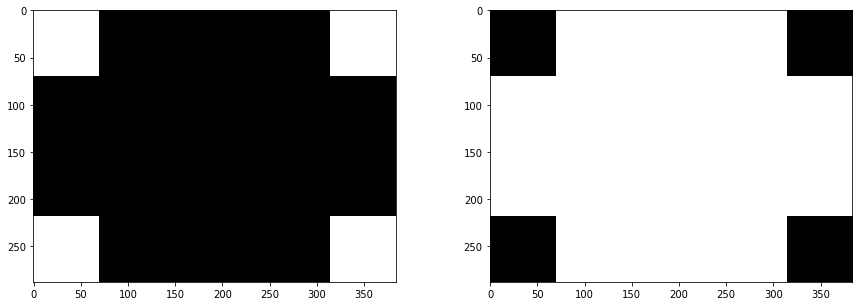

In [160]:
w = 70
F1, F2 = createFilters(rows, cols, w)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

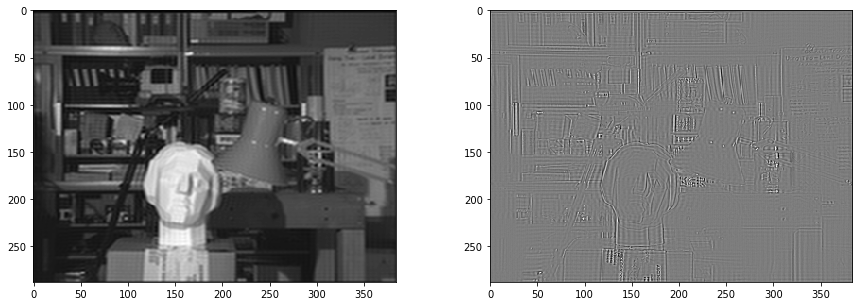

In [161]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

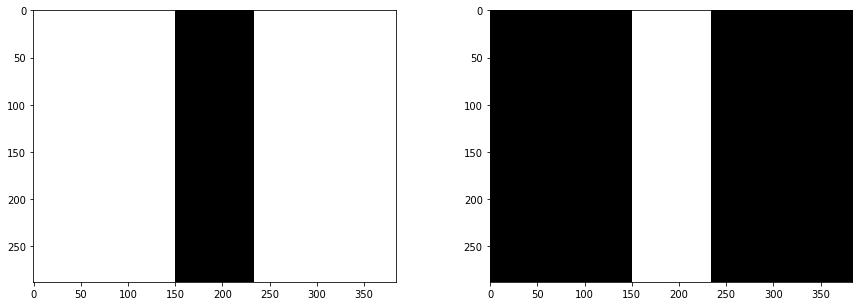

In [162]:
w = 150
F1, F2 = createFilters(rows, cols, w)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

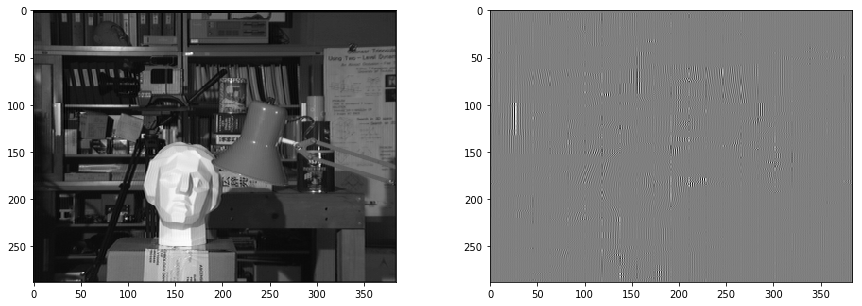

In [163]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

Podemos ver que para los filtros de caja, entre más pequeño sea el tamaño de la caja, el primer filtro genera una imagen de muy baja calidad, mientras que el segundo marca firmemente los bordes horizontales y verticales de la imagen. A medida que el tamaño aumenta, el primer filtro genera una imagen más parecida a la original (su calidad original) y el segundo marca menos los bordes.

b) Diseñe un filtro pasa bajas gaussiano G. Para ello, construya un filtro con densidad gaussiana centrada en el pixel central y varianza $\sigma > 0$ como par ́ametro (Figura 3). Usando un shift del filtro gaussiano (Figura 4), aplique éste último a la transformada de Fourier de la imagen I. Recupere l imagen filtrada y explique el efecto obtenido para diferentes $\sigma$.

Primero hacemos una función que genere el filtro gaussiano con la fórmula de una univariada gaussiana, para hacer esto se recibe el parámetro sigma, el cual afecta el tamaño del filtro. Por último se usa la función fftshif para hacer un recorrimiento de la parte oscura del primer filtro y generar el segundo. Este método regresa los dos filtros.

In [181]:
def normalize_f(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

def createGaussFilters(rows, cols, sigma):
    bright = np.zeros((rows, cols), dtype = 'float')
    s = 2.0 * sigma * sigma
    ssum = 0.0
    x0 = float(cols) / 2.0
    y0 = float(rows) / 2.0

    for i in range(-2, rows - 3):
        for j in range(-2, cols - 3):
            r = np.sqrt((i - y0) ** 2 + (j - x0) ** 2)
            bright[i + 2][j + 2] = (np.exp(-(r * r) / s)) / (np.pi * s)
            ssum += bright[i + 2][j + 2]
    
    bright /= ssum
    bright = normalize_f(bright)
    
    shifted = np.fft.fftshift(bright)

    return bright, shifted

A continuación se verá el efecto de estos dos filtros anteriores con la imagen variando el parámetro sigma.

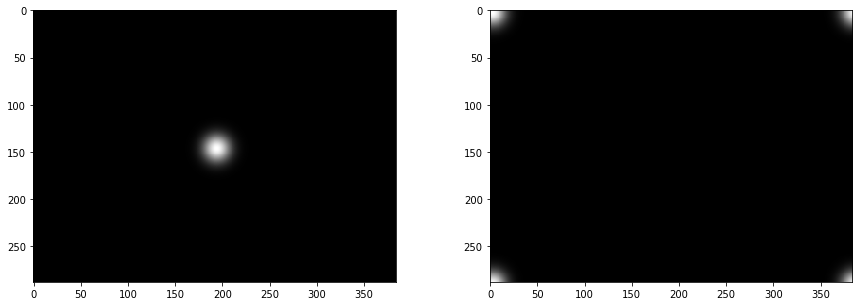

In [183]:
sigma = 10.0
F1, F2 = createGaussFilters(rows, cols, sigma)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

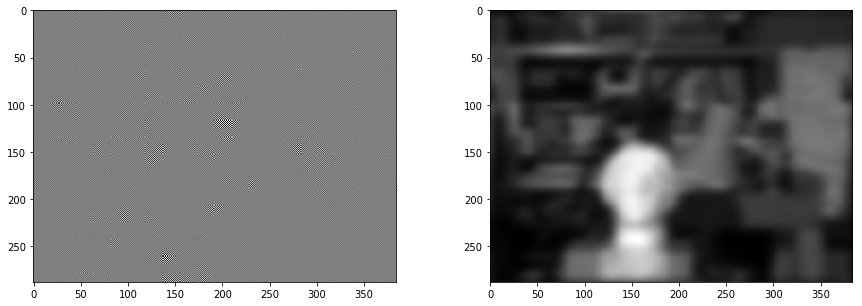

In [184]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

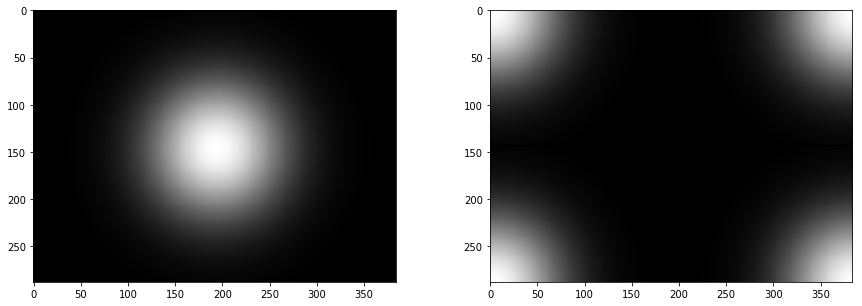

In [185]:
sigma = 50.0
F1, F2 = createGaussFilters(rows, cols, sigma)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

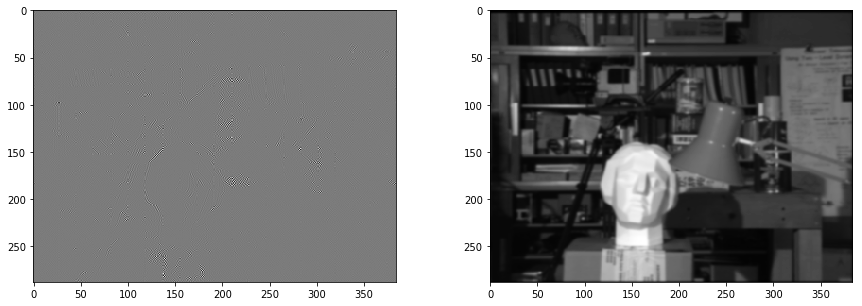

In [186]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

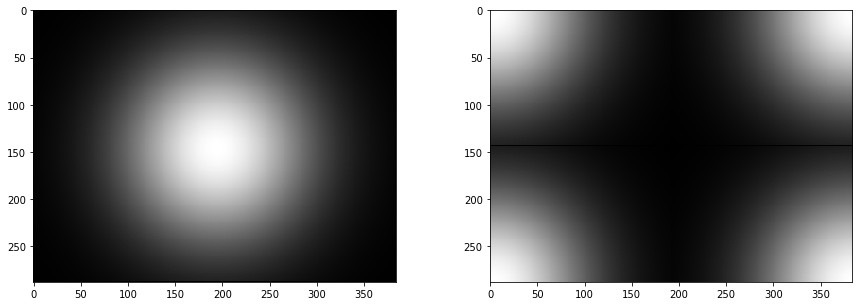

In [187]:
sigma = 70.0
F1, F2 = createGaussFilters(rows, cols, sigma)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

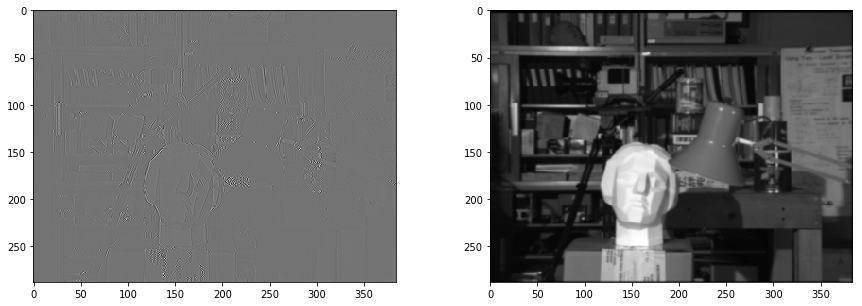

In [188]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

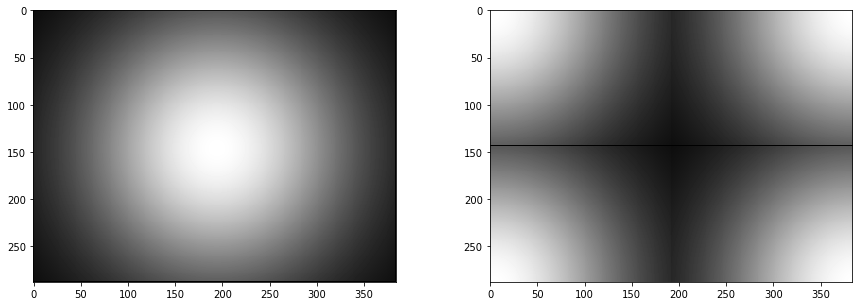

In [189]:
sigma = 100.0
F1, F2 = createGaussFilters(rows, cols, sigma)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(F1, cmap = "gray")
ax12.imshow(F2, cmap = "gray")

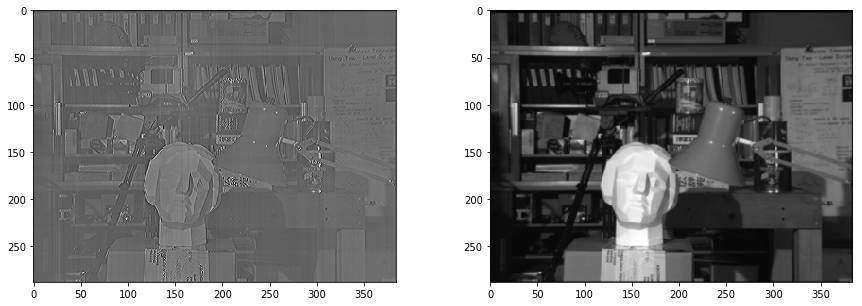

In [190]:
p1 = processFourier(grayImage, F1)
p2 = processFourier(grayImage, F2)

fig1 = plt.figure(figsize = (15, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax12 = fig1.add_subplot(1, 2, 2)

ax11.imshow(p1, cmap = "gray")
ax12.imshow(p2, cmap = "gray")

Podemos ver que el primer filtro genera una imagen completamente gris cuando el sigma es pequeño, mientras que el segundo genera un efecto de blur a la imagen. Cuando sigma es grande, el primer filtro se va desvaneciendo mostrando a la imagen poco a poco mientras que el segundo tiene un efecto de blur menos influente.